Awadhesh Yadav
Batch-1814

In [3]:
import keras
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.callbacks import EarlyStopping ,ModelCheckpoint

Using TensorFlow backend.
C:\Users\awadh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\awadh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\awadh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\awadh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [4]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
  model.add(MaxPooling2D((2, 2)))
  #model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  #model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  #model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

	# compile model
  #opt = SGD(lr=0.001, momentum=0.9)
  #opt = keras.optimizers.Adadelta()
  #opt = keras.optimizers.RMSprop(lr=0.001)
  #opt = keras.optimizers.Nadam(lr=0.001)
  opt = keras.optimizers.Adam(learning_rate=0.001)
  #opt = keras.optimizers.SGD(momentum=0.01, nesterov=True)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [5]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

In [6]:

model = define_model()
print(model.summary())


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2097280   
_________________________

In [7]:
# call define model function
model = define_model()
datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = datagen.flow_from_directory(r'C:\Users\awadh\fk_clothes_data\augu_data_train',
class_mode='binary', batch_size=70, target_size=(64, 64))
test_it = datagen.flow_from_directory(r'C:\Users\awadh\fk_clothes_data\test_clothes',
class_mode='binary', batch_size=70, target_size=(64, 64))


Found 1262 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


**Implement EarlyStopping & Checkpoint**

In [8]:
checkpoint = ModelCheckpoint(r'C:\Users\awadh\mycnn_models\model_checkpoint_Adam.h5',
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')
callbacks =[checkpoint] 

In [9]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)

callbacks = [earlystop,checkpoint]

In [10]:
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1,callbacks=callbacks)


Epoch 1/20
19/19 [==============================] - 8s 417ms/step - loss: 3.3017 - accuracy: 0.5230 - val_loss: 0.6892 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.68918, saving model to C:\Users\awadh\mycnn_models\model_checkpoint_Adam.h5
Epoch 2/20
19/19 [==============================] - 7s 368ms/step - loss: 0.6701 - accuracy: 0.6125 - val_loss: 0.6033 - val_accuracy: 0.8500

Epoch 00002: val_loss improved from 0.68918 to 0.60335, saving model to C:\Users\awadh\mycnn_models\model_checkpoint_Adam.h5
Epoch 3/20
19/19 [==============================] - 7s 390ms/step - loss: 0.5476 - accuracy: 0.7353 - val_loss: 0.3855 - val_accuracy: 0.9000

Epoch 00003: val_loss improved from 0.60335 to 0.38548, saving model to C:\Users\awadh\mycnn_models\model_checkpoint_Adam.h5
Epoch 4/20
19/19 [==============================] - 8s 404ms/step - loss: 0.3789 - accuracy: 0.8384 - val_loss: 0.2765 - val_accuracy: 0.9250

Epoch 00004: val_loss improved from 0.38548 to 0.27649, 

In [11]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)

> 92.500


**Load Image for Validation**

In [15]:
import keras
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
image = image.load_img(r'C:\Users\awadh\fk_clothes_data\validate_clothes/tr4.jpeg', target_size=(64, 64))
input_arr = keras.preprocessing.image.img_to_array(image)
#x = np.expand_dims(input_arr, axis=0)   ## Convert single image to a batch.
input_arr = np.array([input_arr])        ## Convert single image to a batch.
#predictions = model.predict(input_arr)

**Prediction**

In [16]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# load model
#model = load_model('my_flower_classi_model')
#predictions_classes = model.predict_classes(input_arr)

predictions_classes = model.predict_classes(input_arr)

def predict_img():
  if predictions_classes ==0:
    print("Class {} means it is a 'Jeans Image'".format(predictions_classes))
  if predictions_classes ==1:
    print("Class {} means it is a 'Trouser Image'".format(predictions_classes))

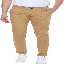

In [17]:
image

In [18]:
predict_img()

Class [[1]] means it is a 'Trouser Image'
